Error importing huggingface_hub.file_download: 'Version'


/home/locolinux2/miniconda3/envs/U24/lib/python3.9/site-packages/generative/networks/layers/vector_quantizer.py:86: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/home/locolinux2/miniconda3/envs/U24/lib/python3.9/site-packages/generative/networks/layers/vector_quantizer.py:124: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)


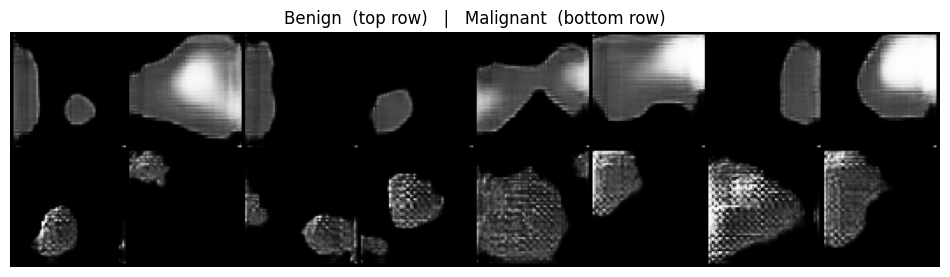

In [1]:
# ---------------- 1. imports ----------------
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

from model_architectures.wcgan import ConditionalWGAN   # import *exact* class you trained

ckpt = "experiments/135_GAN_binary_11perepoch_12vs56/checkpoints/epoch=01-step=5520.ckpt"

# ---------------- 2. load model -------------
model = ConditionalWGAN.load_from_checkpoint(ckpt)
model = model.eval().to("cuda" if torch.cuda.is_available() else "cpu")

# ---------------- 3. sampling --------------
with torch.no_grad():
    # 8 benign (label 0), 8 malignant (label 1)
    imgs_benign  = model.sample(label=0, N=8)   # shape (8,1,H,W), scaled to [0,1]
    imgs_malign  = model.sample(label=1, N=8)

# ---------------- 4. visualise -------------
grid = make_grid(torch.cat([imgs_benign, imgs_malign], 0), nrow=8, value_range=(0,1))
plt.figure(figsize=(12,4))
plt.imshow(grid.permute(1,2,0).cpu())
plt.axis("off")
plt.title("Benign  (top row)   |   Malignant  (bottom row)")
plt.show()


In [2]:
%load_ext tensorboard
%tensorboard --logdir logs/ --port 6007